In [1]:
# import libraries
import statistics 
import numpy as np
import pandas as pd
import seaborn as sns
from xgboost import plot_importance
from xgboost import XGBRegressor as xgb
import matplotlib.pyplot as plt
from IPython.display import HTML, display, clear_output
%matplotlib inline
sns.set(rc={'figure.figsize':(18,6)})
import os
# os.listdir()

/home/aakash/.local/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
# import train and test dataset
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')

In [3]:
print("Train shape:", train.shape)
print("Test shape:", test.shape)
train.head()

Train shape: (116058, 29)
Test shape: (35866, 28)


,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,3,4,5,6,7,8,9,10,11,1


In [4]:
# print columns in training dataset
train.columns

Index(['loan_id', 'source', 'financial_institution', 'interest_rate',
       'unpaid_principal_bal', 'loan_term', 'origination_date',
       'first_payment_date', 'loan_to_value', 'number_of_borrowers',
       'debt_to_income_ratio', 'borrower_credit_score', 'loan_purpose',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13'],
      dtype='object')

In [5]:
train.describe()

,loan_id,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
count,1.160580e+05,116058.000000,1.160580e+05,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,...,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000
mean,5.494155e+11,3.868961,2.082262e+05,292.280997,67.431939,1.593186,30.742293,769.926778,2.786288,459.611565,...,0.002180,0.003533,0.003421,0.004162,0.004825,0.005359,0.006617,0.007109,0.008065,0.005480
std,2.597560e+11,0.461020,1.146851e+05,89.762415,17.291719,0.491242,9.730798,42.210706,8.096464,381.946926,...,0.062161,0.082638,0.087553,0.100961,0.113128,0.128242,0.148430,0.162884,0.178128,0.073824
min,1.000009e+11,2.250000,1.100000e+04,60.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.244656e+11,3.500000,1.200000e+05,180.000000,57.000000,1.000000,23.000000,751.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.486239e+11,3.875000,1.830000e+05,360.000000,72.000000,2.000000,31.000000,782.000000,0.000000,740.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.743034e+11,4.125000,2.780000e+05,360.000000,80.000000,2.000000,39.000000,800.000000,0.000000,791.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.999971e+11,6.750000,1.200000e+06,360.000000,97.000000,2.000000,64.000000,840.000000,40.000000,836.000000,...,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000,1.000000


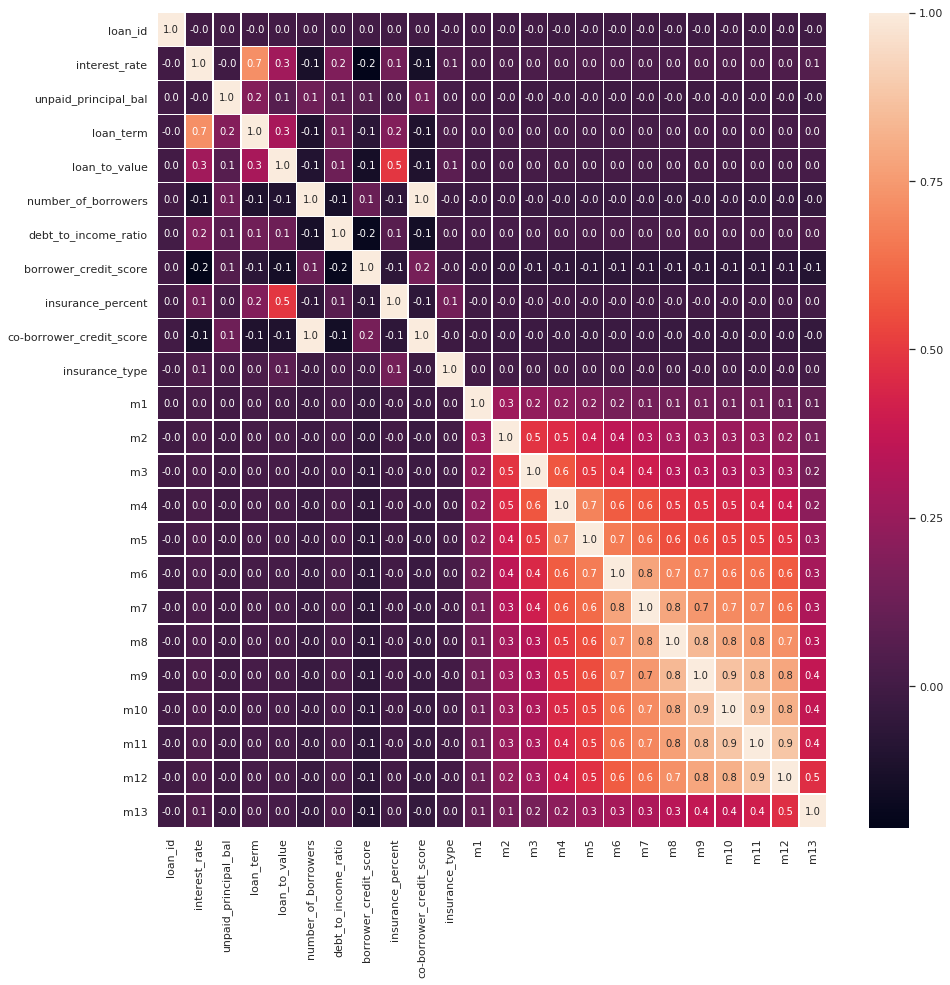

In [6]:
# plot training dataset heatmap
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [7]:
# drop columns array
drop_col_array = [  'loan_id' ]
print(drop_col_array)

['loan_id']


In [8]:
# drop loan_id
train = train.drop(drop_col_array, axis=1)
test = test.drop(drop_col_array, axis=1)
print(train.shape, test.shape)

(116058, 28) (35866, 27)


In [9]:
# checking missing data percentage in train data
total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum()/train.isnull().count()*100).sort_values(ascending = False)
missing_train  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_train.head(30)

,Total,Percent
m13,0,0.0
m12,0,0.0
financial_institution,0,0.0
interest_rate,0,0.0
unpaid_principal_bal,0,0.0
loan_term,0,0.0
origination_date,0,0.0
first_payment_date,0,0.0
loan_to_value,0,0.0
number_of_borrowers,0,0.0


In [10]:
# print data types of each column
train.dtypes

source                       object
financial_institution        object
interest_rate               float64
unpaid_principal_bal          int64
loan_term                     int64
origination_date             object
first_payment_date           object
loan_to_value                 int64
number_of_borrowers         float64
debt_to_income_ratio        float64
borrower_credit_score       float64
loan_purpose                 object
insurance_percent           float64
co-borrower_credit_score    float64
insurance_type              float64
m1                            int64
m2                            int64
m3                            int64
m4                            int64
m5                            int64
m6                            int64
m7                            int64
m8                            int64
m9                            int64
m10                           int64
m11                           int64
m12                           int64
m13                         

In [11]:
# Print number of unique elements in each column
for column in train.columns:
    print(train[column].nunique(),"  ", column)

3    source
19    financial_institution
923    interest_rate
646    unpaid_principal_bal
140    loan_term
3    origination_date
4    first_payment_date
92    loan_to_value
2    number_of_borrowers
58    debt_to_income_ratio
221    borrower_credit_score
3    loan_purpose
14    insurance_percent
216    co-borrower_credit_score
2    insurance_type
4    m1
5    m2
6    m3
7    m4
8    m5
9    m6
10    m7
10    m8
11    m9
12    m10
13    m11
13    m12
2    m13


# Data Visualization

In [12]:
train.head()

,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,22.0,...,0,0,0,1,0,0,0,0,0,1
1,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,44.0,...,0,0,0,0,0,0,0,1,0,1
2,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,33.0,...,0,0,0,0,0,0,0,0,0,1
3,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,44.0,...,0,0,0,0,0,1,1,1,1,1
4,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,43.0,...,3,4,5,6,7,8,9,10,11,1


In [13]:
# This function returns the count plot of a column with percentage of each class
def plot_bar_counts_categorical(data_se, title, figsize, sort_by_counts=False):
    info = data_se.value_counts()
    info_norm = data_se.value_counts(normalize=True)
    categories = info.index.values
    counts = info.values
    counts_norm = info_norm.values
    fig, ax = plt.subplots(figsize=figsize)
    if data_se.dtype in ['object']:
        if sort_by_counts == False:
            inds = categories.argsort()
            counts = counts[inds]
            counts_norm = counts_norm[inds]
            categories = categories[inds]
        ax = sns.barplot(counts, categories, orient = "h", ax=ax)
        ax.set(xlabel="count", ylabel=data_se.name)
        ax.set_title("Distribution of " + title)
        for n, da in enumerate(counts):
            ax.text(da, n, str(da)+ ",  " + str(round(counts_norm[n]*100,2)) + " %", fontsize=10, va='center')
    else:
        inds = categories.argsort()
        counts_sorted = counts[inds]
        counts_norm_sorted = counts_norm[inds]
        ax = sns.barplot(categories, counts, orient = "v", ax=ax)
        ax.set(xlabel=data_se.name, ylabel='count')
        ax.set_title("Distribution of " + title)
        for n, da in enumerate(counts_sorted):
            ax.text(n, da, str(da)+ ",  " + str(round(counts_norm_sorted[n]*100,2)) + " %", fontsize=10, ha='center')

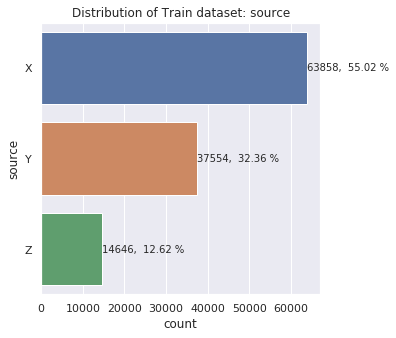

In [14]:
plot_bar_counts_categorical(train['source'], 'Train dataset: source', (5,5))

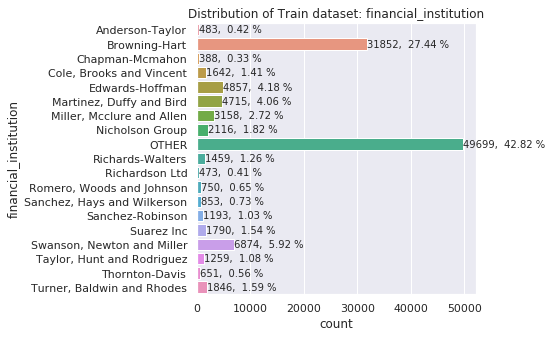

In [15]:
plot_bar_counts_categorical(train['financial_institution'], 'Train dataset: financial_institution', (5,5))

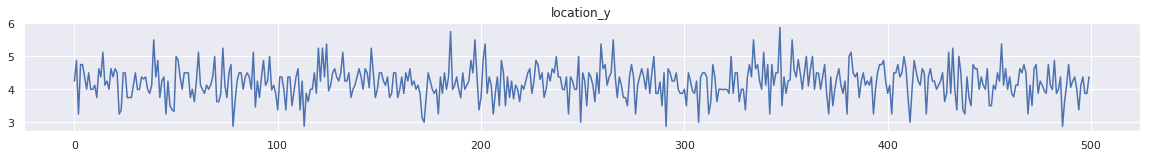

In [16]:
plt.figure(figsize=(20, 2))
plt.plot(train['interest_rate'][:500])
plt.title('location_y')
plt.show()

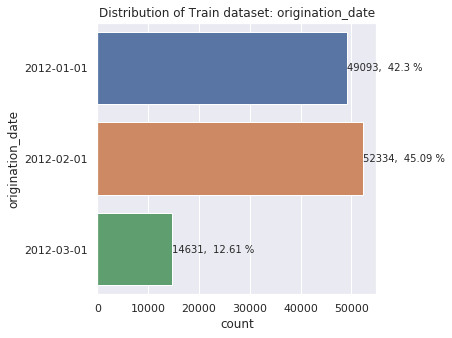

In [17]:
plot_bar_counts_categorical(train['origination_date'], 'Train dataset: origination_date', (5,5))

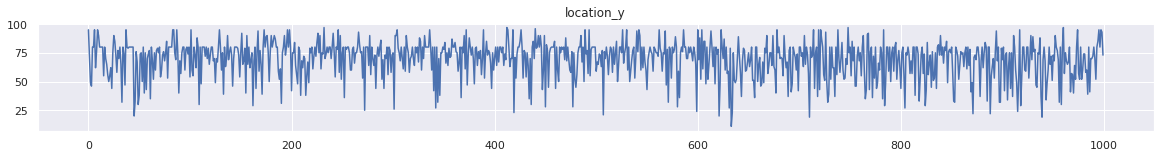

In [18]:
plt.figure(figsize=(20, 2))
plt.plot(train['loan_to_value'][:1000])
plt.title('location_y')
plt.show()

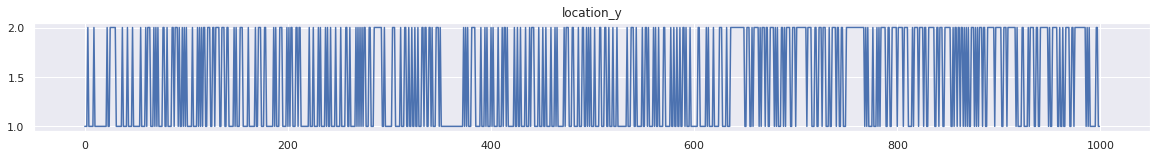

In [19]:
plt.figure(figsize=(20, 2))
plt.plot(train['number_of_borrowers'][:1000])
plt.title('location_y')
plt.show()

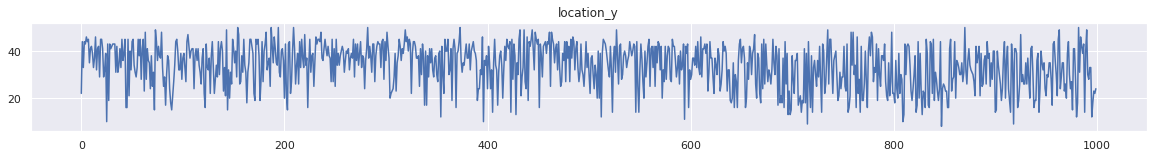

In [20]:
plt.figure(figsize=(20, 2))
plt.plot(train['debt_to_income_ratio'][:1000])
plt.title('location_y')
plt.show()

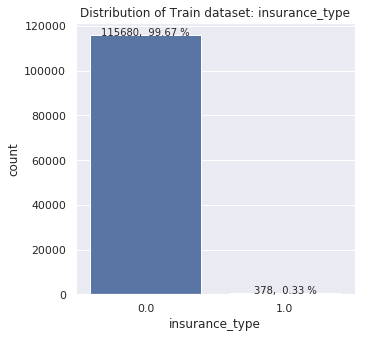

In [21]:
plot_bar_counts_categorical(train['insurance_type'], 'Train dataset: insurance_type', (5,5))

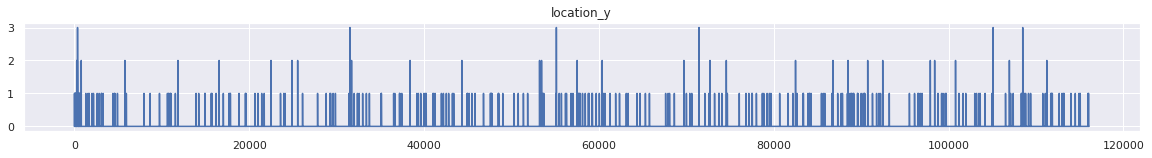

In [22]:
plt.figure(figsize=(20, 2))
plt.plot(train['m1'][:])
plt.title('location_y')
plt.show()

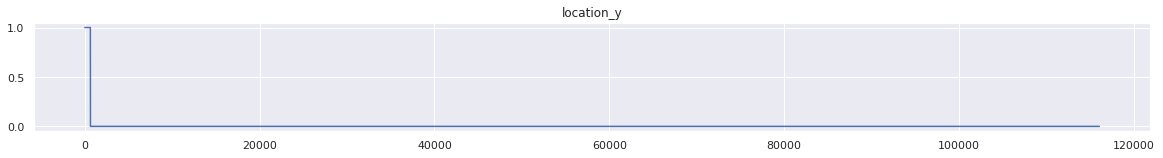

In [23]:
plt.figure(figsize=(20, 2))
plt.plot(train['m13'][:])
plt.title('location_y')
plt.show()

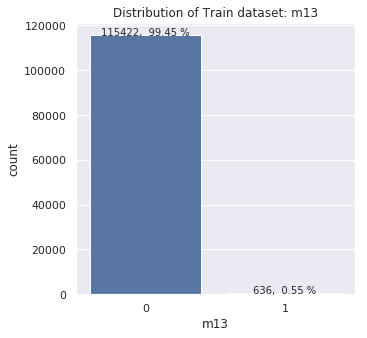

In [24]:
plot_bar_counts_categorical(train['m13'], 'Train dataset: m13', (5,5))

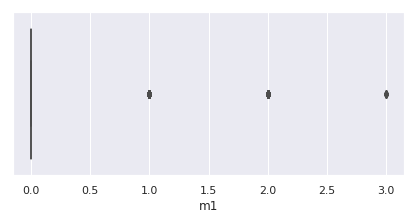

In [25]:
plt.figure(figsize=(7, 3))
sns.boxplot(train["m1"])
plt.show()

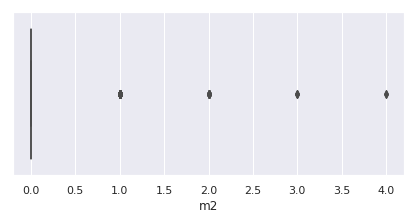

In [26]:
plt.figure(figsize=(7, 3))
sns.boxplot(train["m2"])
plt.show()

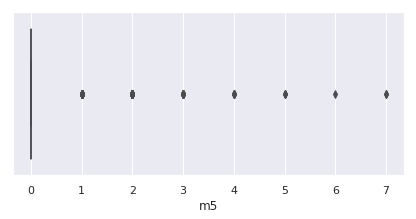

In [27]:
plt.figure(figsize=(7, 3))
sns.boxplot(train["m5"])
plt.show()

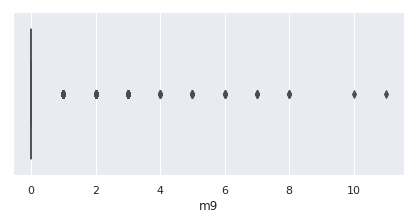

In [28]:
plt.figure(figsize=(7, 3))
sns.boxplot(train["m9"])
plt.show()

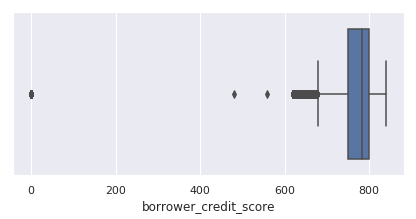

In [29]:
plt.figure(figsize=(7, 3))
sns.boxplot(train["borrower_credit_score"])
plt.show()

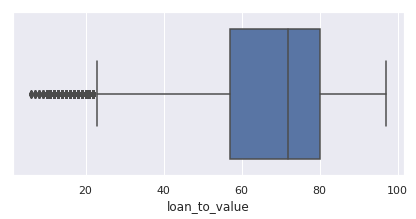

In [30]:
plt.figure(figsize=(7, 3))
sns.boxplot(train["loan_to_value"])
plt.show()

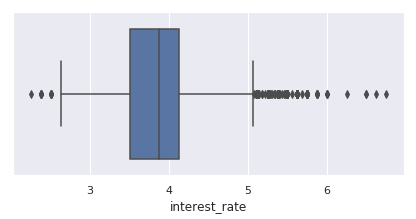

In [31]:
plt.figure(figsize=(7, 3))
sns.boxplot(train["interest_rate"])
plt.show()

Label Encoding

In [32]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

for x in train.columns:
    if train[x].dtype == type(object):
        train[x] = train[x].fillna('NaN')
        test[x] = test[x].fillna('NaN')
        encoder = LabelEncoder()
        encoder.fit(list(set(list(train[x]) + list(test[x]))))
        train[x] = encoder.transform(train[x])
        test[x] = encoder.transform(test[x])

In [33]:
train.head()

,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,2,18,4.250,214000,360,5,3,95,1.0,22.0,...,0,0,0,1,0,0,0,0,0,1
1,1,15,4.875,144000,360,3,1,72,1.0,44.0,...,0,0,0,0,0,0,0,1,0,1
2,2,17,3.250,366000,180,3,1,49,1.0,33.0,...,0,0,0,0,0,0,0,0,0,1
3,0,8,4.750,135000,360,4,2,46,2.0,44.0,...,0,0,0,0,0,1,1,1,1,1
4,0,8,4.750,124000,360,4,2,80,1.0,43.0,...,3,4,5,6,7,8,9,10,11,1


In [34]:
test.head()

,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,...,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,1,1,3.875,417000,360,1,4,75,1,20,...,0,0,0,0,0,0,0,0,0,0
1,0,8,4.500,113000,360,1,4,80,2,33,...,0,0,0,0,0,0,0,0,0,0
2,1,8,4.500,72000,360,0,6,75,1,34,...,0,0,0,0,0,0,0,0,0,0
3,0,6,4.125,123000,180,1,4,41,2,24,...,0,0,0,0,0,0,0,0,0,0
4,0,1,3.250,166000,180,1,4,53,2,12,...,0,0,0,0,0,0,0,0,0,0


In [35]:
print(train.shape)
print(test.shape)

(116058, 28)
(35866, 27)


# Model Training

In [36]:
# Splitting training dataset into train and test
X = train.copy().drop('m13', axis=1).values
y = train['m13']

In [37]:
print(train.shape)
print(X.shape)
print(y.shape)

(116058, 28)
(116058, 27)
(116058,)


In [38]:
X[:2]

array([[2.000e+00, 1.800e+01, 4.250e+00, 2.140e+05, 3.600e+02, 5.000e+00,
        3.000e+00, 9.500e+01, 1.000e+00, 2.200e+01, 6.940e+02, 2.000e+00,
        3.000e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 1.500e+01, 4.875e+00, 1.440e+05, 3.600e+02, 3.000e+00,
        1.000e+00, 7.200e+01, 1.000e+00, 4.400e+01, 6.970e+02, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00]])

In [39]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_whole = sc.transform(X.copy())
test_v = sc.transform(test.copy().values)

In [40]:
X[0], X_train[0]

(array([2.00e+00, 1.80e+01, 4.25e+00, 2.14e+05, 3.60e+02, 5.00e+00,
        3.00e+00, 9.50e+01, 1.00e+00, 2.20e+01, 6.94e+02, 2.00e+00,
        3.00e+01, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00]),
 array([-0.81752095,  0.33647587,  0.82546665,  0.37097056,  0.75507947,
        -1.03819157, -1.03290048,  0.72563478,  0.82799348, -0.38541755,
        -1.61766047, -0.89583399, -0.34501999,  0.90139586, -0.05670643,
        -0.05050287, -0.040401  , -0.03747669, -0.03661092, -0.04404581,
        -0.03776765, -0.04130971, -0.04369236, -0.04302346, -0.04544529,
        -0.04426267, -0.04594029]))

In [41]:
test_v

array([[ 0.60175138, -1.23566541,  0.01325   , ..., -0.04544529,
        -0.04426267, -0.04594029],
       [-0.81752095,  0.33647587,  1.36694442, ..., -0.04544529,
        -0.04426267, -0.04594029],
       [ 0.60175138,  0.33647587,  1.36694442, ..., -0.04544529,
        -0.04426267, -0.04594029],
       ...,
       [-0.81752095, -1.23566541,  0.82546665, ..., -0.04544529,
        -0.04426267, -0.04594029],
       [ 0.60175138, -0.56189057,  1.09620554, ..., -0.04544529,
        -0.04426267, -0.04594029],
       [-0.81752095,  0.33647587,  1.09620554, ..., -0.04544529,
        -0.04426267, -0.04594029]])

# XGBoost

In [42]:
# XGB Classifier
from xgboost import XGBClassifier

classifier = XGBClassifier( learning_rate =0.1,
 n_estimators=112,
 max_depth=9,
 min_child_weight=5,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.6,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=13,
 reg_lambda=5,
# max_delta_step=1,
 alpha=0,
 base_score=0.5,
 seed=1029)

classifier.fit(X_train, y_train)

XGBClassifier(alpha=0, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=0.6, gamma=0, learning_rate=0.1,
              max_delta_step=0, max_depth=9, min_child_weight=5, missing=None,
              n_estimators=112, n_jobs=1, nthread=4,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=5, scale_pos_weight=13, seed=1029, silent=True,
              subsample=0.8)

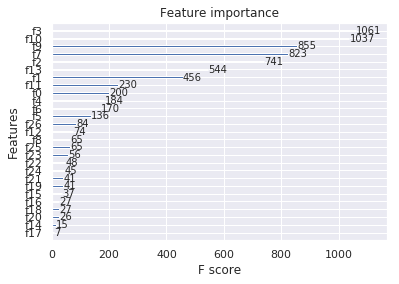

<Figure size 14400x14400 with 0 Axes>

In [43]:
# plot feature importance
plot_importance(classifier)
plt.figure(figsize=(200, 200))
plt.show()

In [44]:
print(classifier.feature_importances_)

[0.02818887 0.06427062 0.10443974 0.14954193 0.02593376 0.01916843
 0.02396054 0.11599718 0.00916138 0.1205074  0.14615926 0.0324172
 0.01042988 0.07667372 0.00211416 0.00521494 0.0038055  0.00098661
 0.0038055  0.00577872 0.00366455 0.00577872 0.00676533 0.00789288
 0.00634249 0.00916138 0.01183932]


In [45]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
# print f1 score
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.5802047781569967

In [47]:
test_pred = classifier.predict(test_v)

In [48]:
print(test_pred.shape)
test_pred[:10]

(35866,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [49]:
# print number of 1s and 0s in predicted values

unique, counts = np.unique(test_pred, return_counts=True)
dict(zip(unique, counts))

{0: 35716, 1: 150}

In [50]:
# load loan_id of test dataset
test_loan_id = pd.read_csv('dataset/test.csv')['loan_id']
print(test_loan_id.shape)

(35866,)


In [51]:
# save results to csv
subm = pd.DataFrame({'loan_id': test_loan_id, 'm13': test_pred})
subm = subm[['loan_id','m13']]    

filename='solution/AakashJhawar_16011999_final.csv'
subm.to_csv(filename, index=False)
